In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

# 로이더 기사 데이터를 사용한다.

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Keras 의 원핫 인코딩 기능을 사용한다.

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 133us/step - loss: 2.6421 - accuracy: 0.5298 - val_loss: 1.7160 - val_accuracy: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.4000 - accuracy: 0.7018 - val_loss: 1.3013 - val_accuracy: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.0346 - accuracy: 0.7814 - val_loss: 1.1391 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.8160 - accuracy: 0.8287 - val_loss: 1.0315 - val_accuracy: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.6422 - accuracy: 0.8662 - val_loss: 1.0004 - val_accuracy: 0.7960
Epoch 6/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.5107 - accuracy: 0.8965 - val_loss: 0.9287 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.41

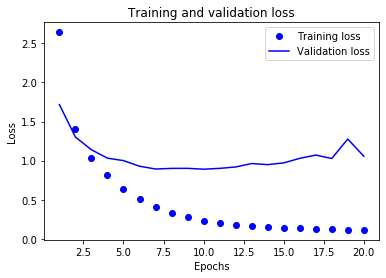

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

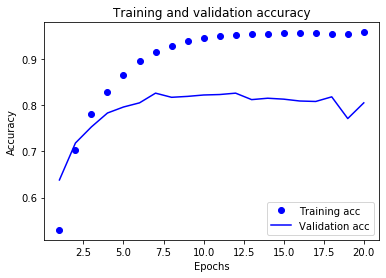

In [11]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()